In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read data
# TODO: replace with path to cleaned data
DATA_PATH = "../cleaned_output.csv"
data = pd.read_csv(DATA_PATH)
data.head()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6.0,"Week day lunch,At a party,Late night snack",5.0,cloudy with a chance of meatballs,coca cola,Friends,A little (mild),Pizza
1,715742,4,2.0,"Week day lunch,At a party,Late night snack",5.0,all sort of american young boy movies,coca cola,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5.0,"Week day lunch,Week day dinner,Weekend lunch,W...",NaN,action movie,coca cola,Friends,A moderate amount (medium),Pizza
3,606874,4,6.5,"Week day lunch,Week day dinner,Weekend lunch,W...",3.0,mamma mia,pop,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3.0,"Week day lunch,Week day dinner,Weekend lunch,W...",5.0,cloudy with a chance of meatballs,pop,"Siblings,Friends",A little (mild),Pizza


In [4]:
# Expected data:
# Q1: Categorical, complexity to make the food
# Q2: Numerical, number of ingredients
# Q3: Categorical, setting where the food is served
# Q4: Numerical, cost of the food
# Q5: Categorical, what movie goes with the food
# Q6: Categorical, what drink goes with the food
# Q7: Categorical, what people goes with the food
# Q8: Categorical, how much hot sauce

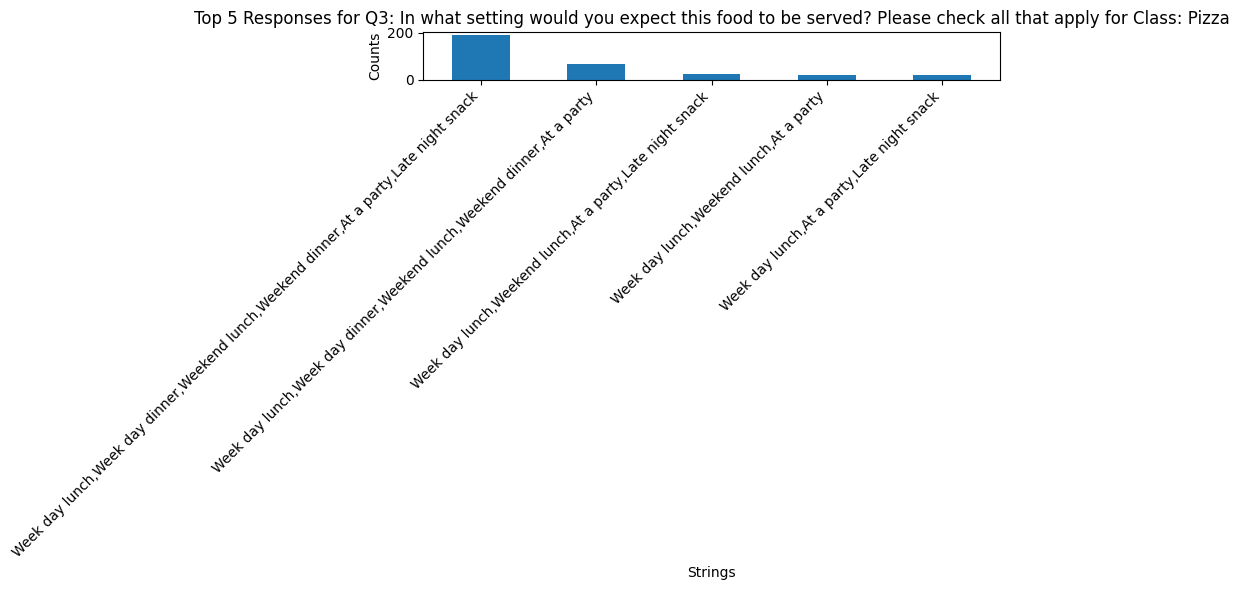

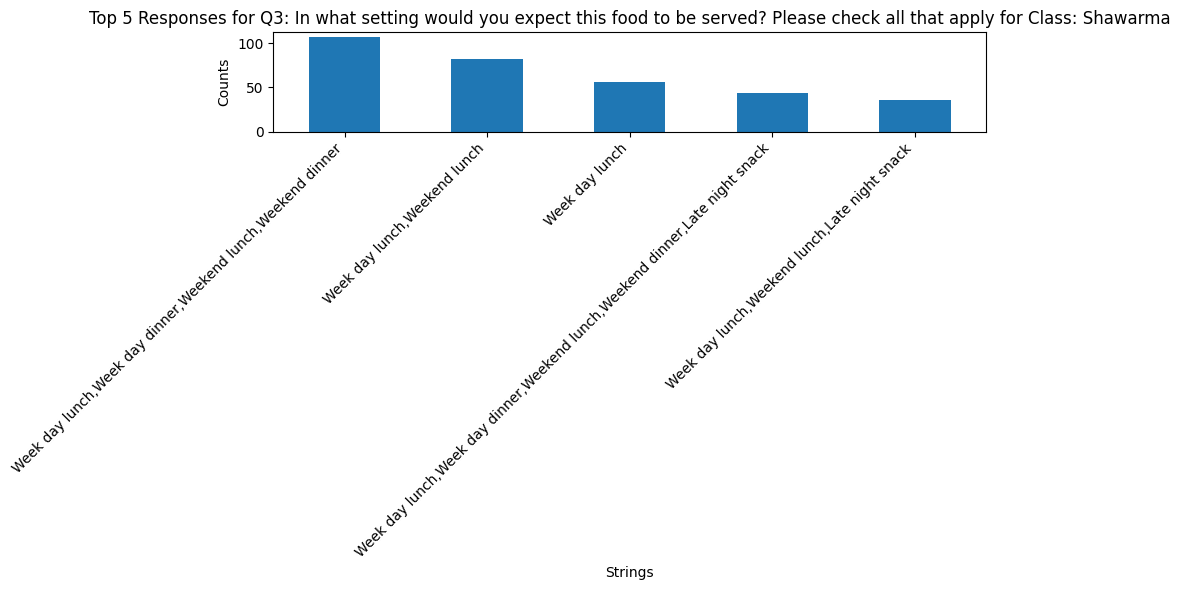

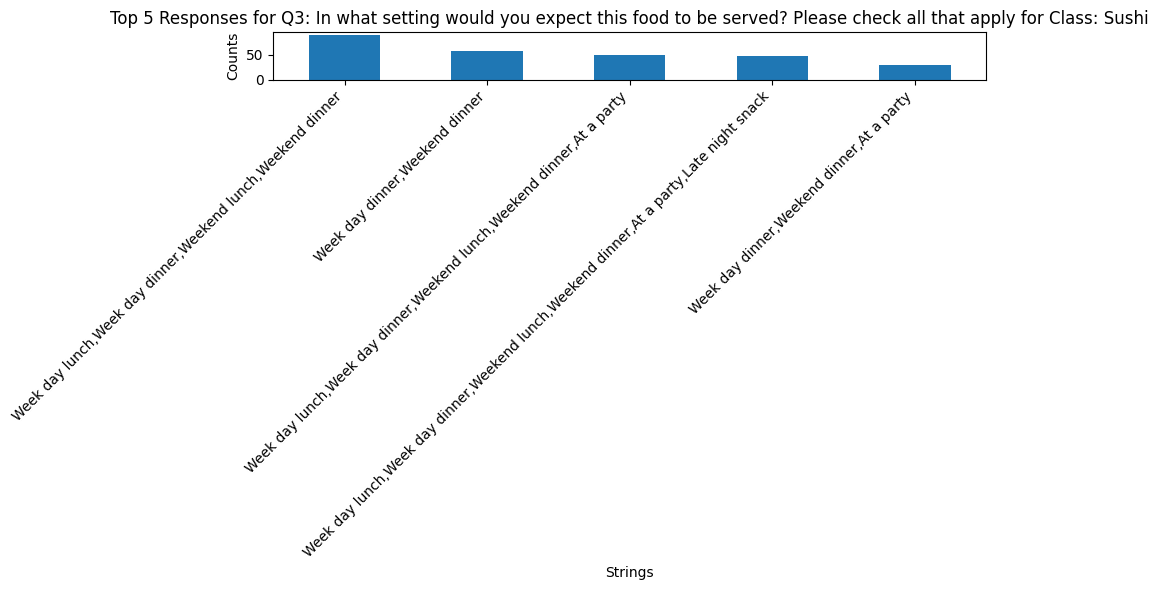

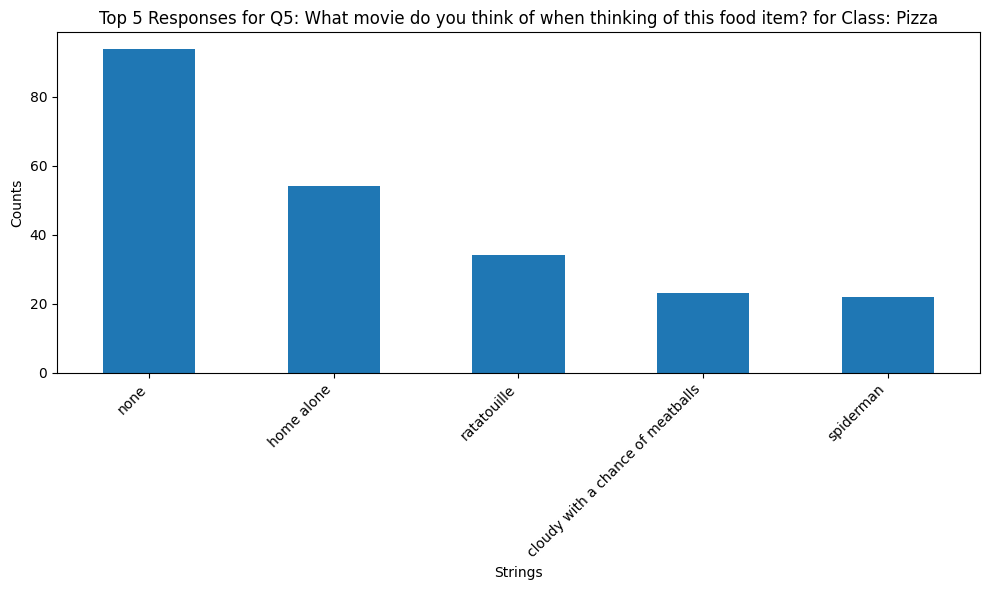

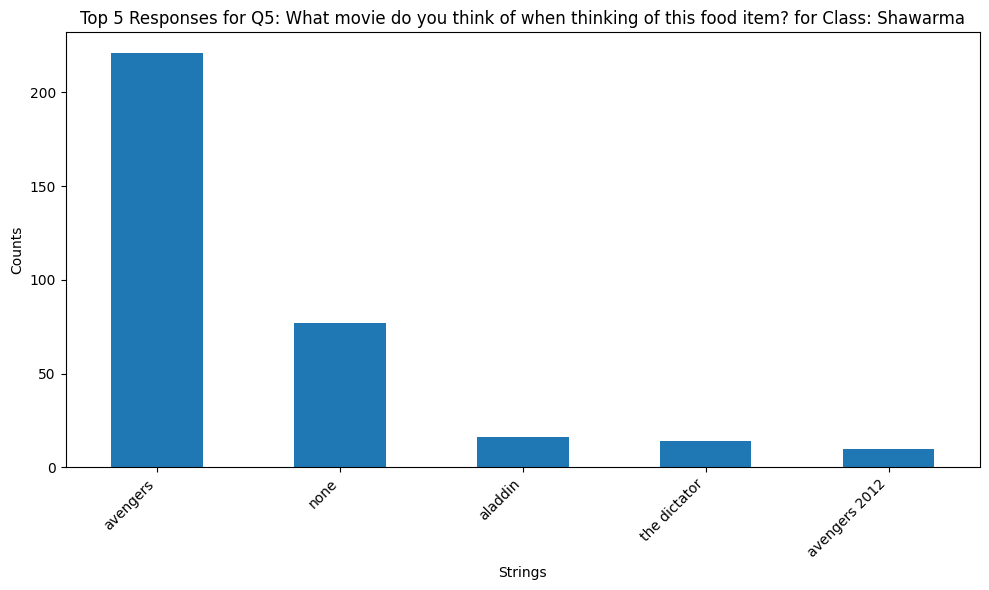

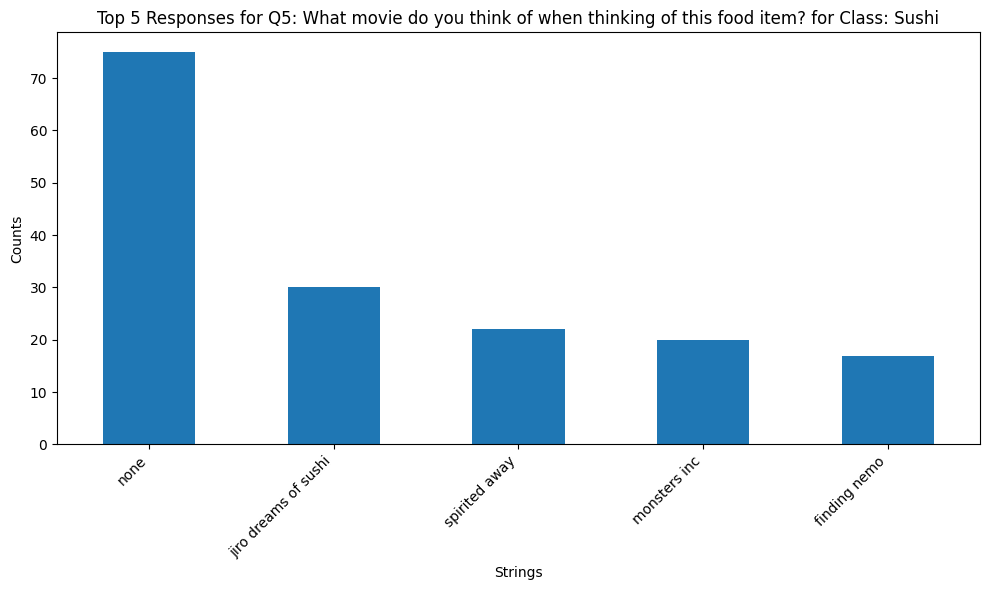

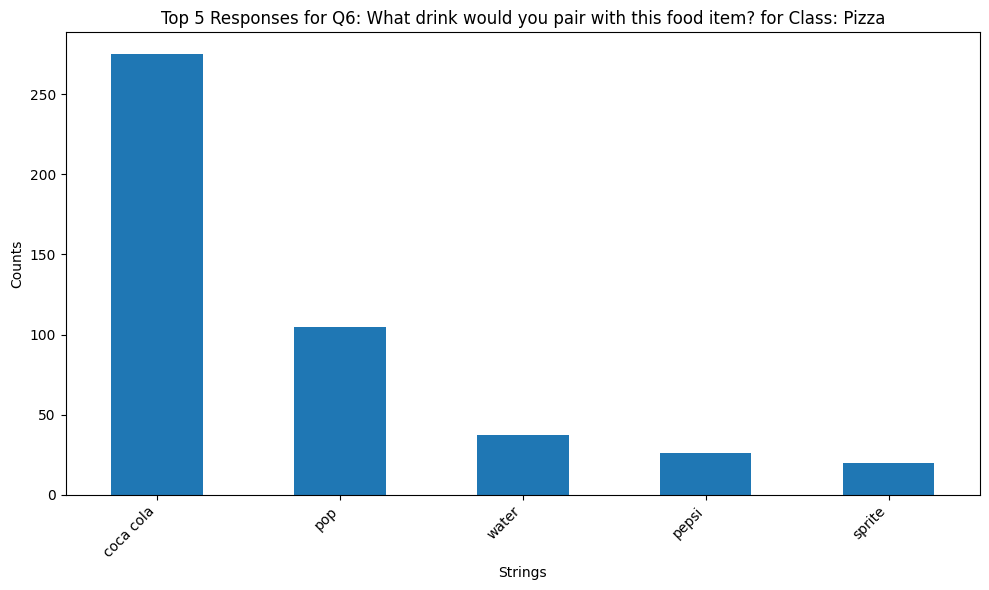

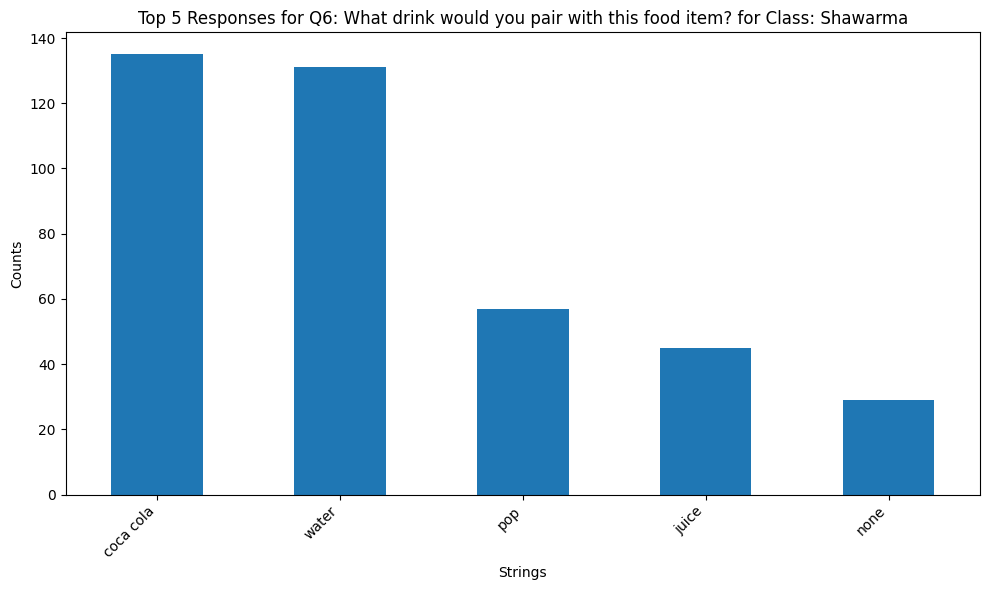

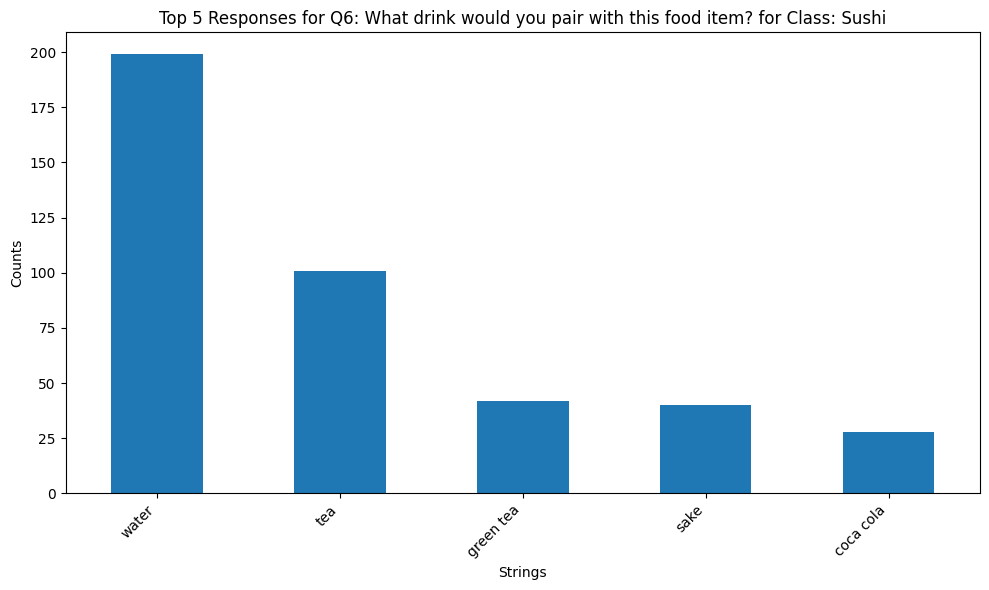

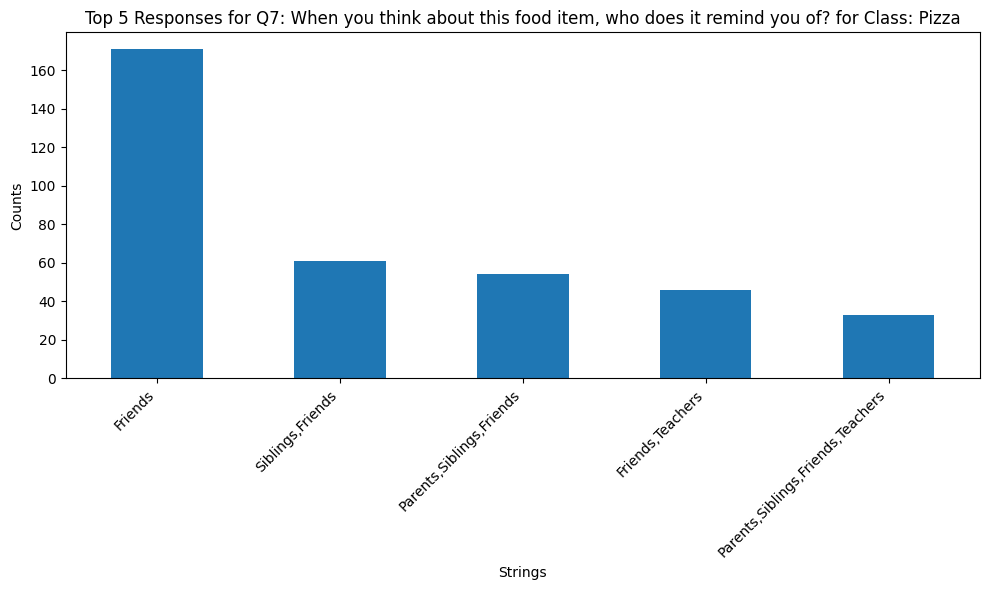

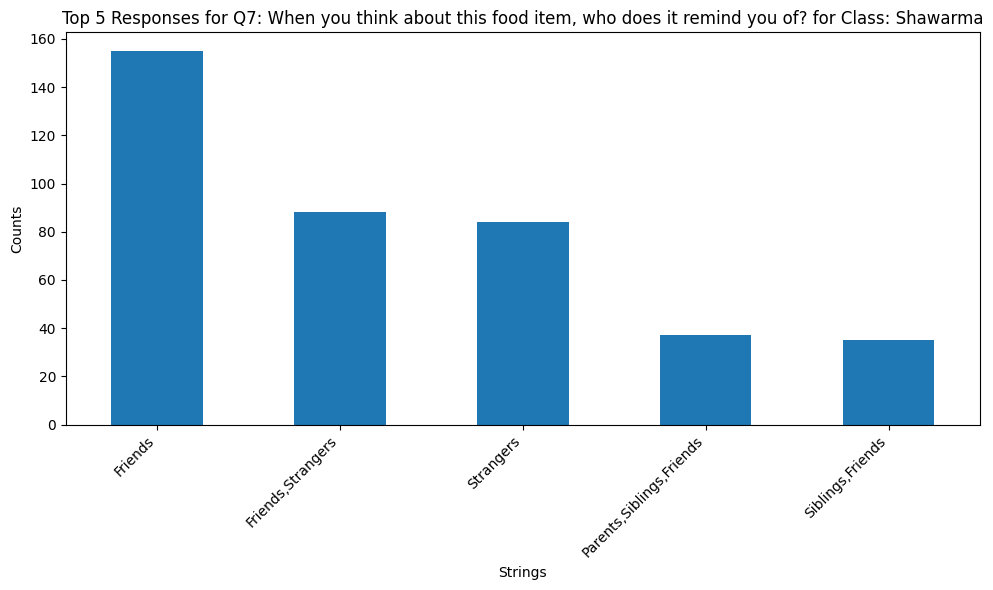

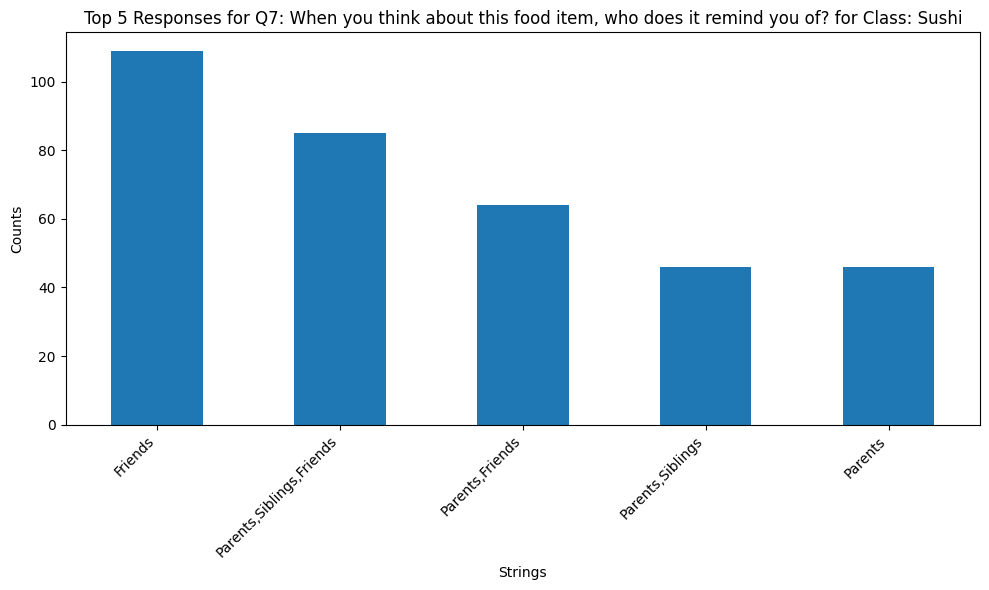

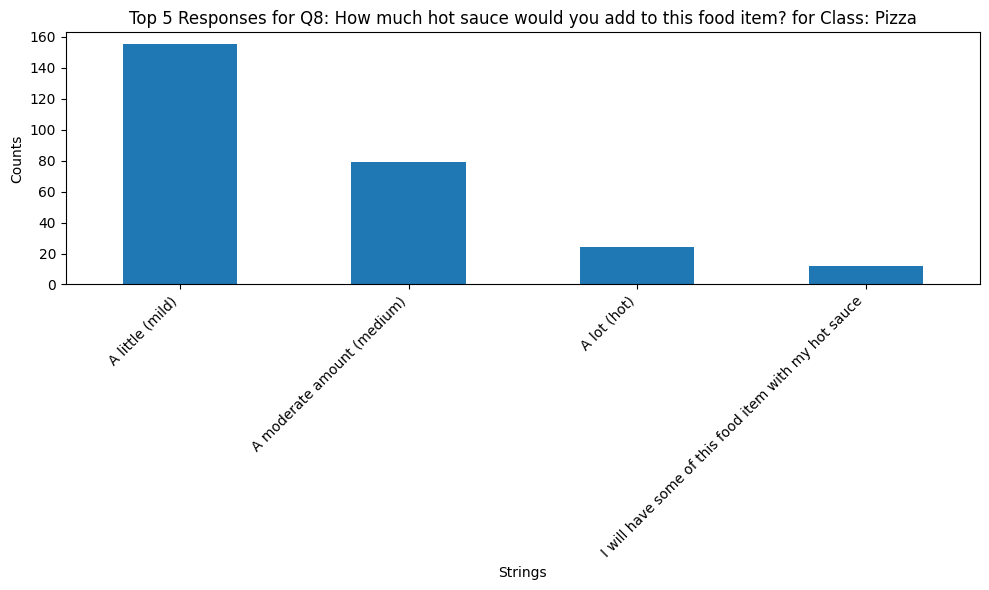

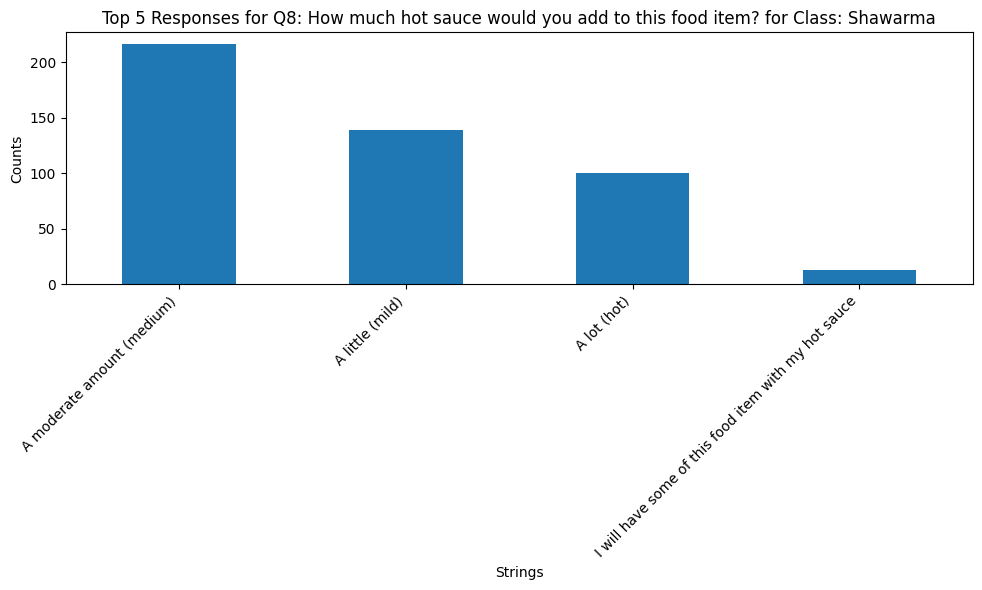

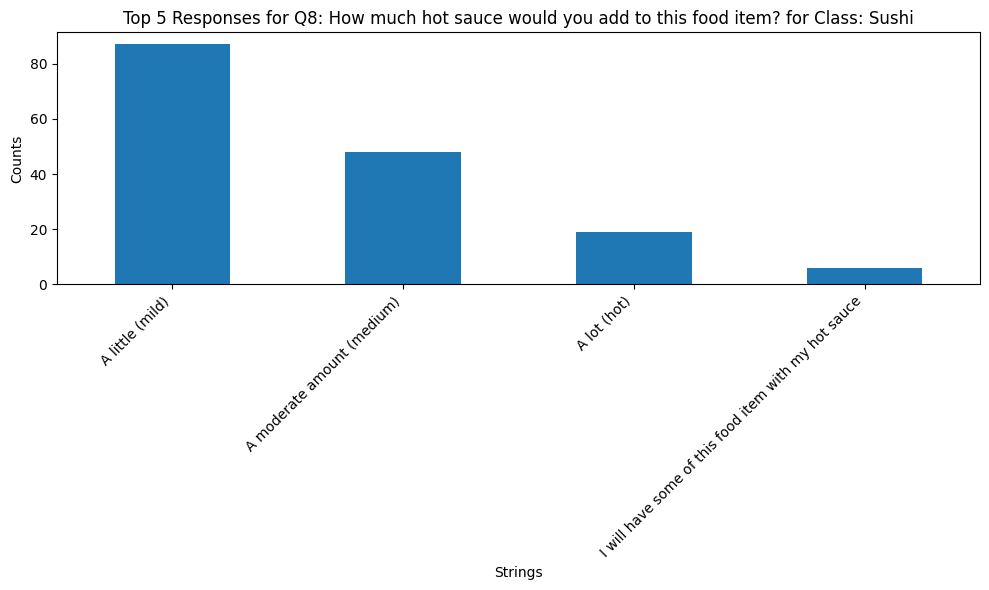

In [28]:

# Visualize all categorical columns
categorical_columns = [3, 5, 6, 7, 8]

# Get the unique food labels
labels = data["Label"].unique()

for col_idx in categorical_columns:
    column = data.columns[col_idx]
    
    unique_classes = data['Label'].unique()

    for class_value in unique_classes:
        class_data = data[data['Label'] == class_value][column]
        string_counts = class_data.value_counts().nlargest(5)

        plt.figure(figsize=(10, 6))
        string_counts.plot(kind='bar')
        plt.title(f"Top 5 Responses for {column} for Class: {class_value}")
        plt.xlabel("Strings")
        plt.ylabel("Counts")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f"top_5_responses_{column}_{class_value}.png")
        plt.show()
    
    # Adjust layout
    # plt.tight_layout()
    # plt.savefig(f"top_5_responses_{column}.png")
    # plt.show()

<Figure size 800x600 with 0 Axes>

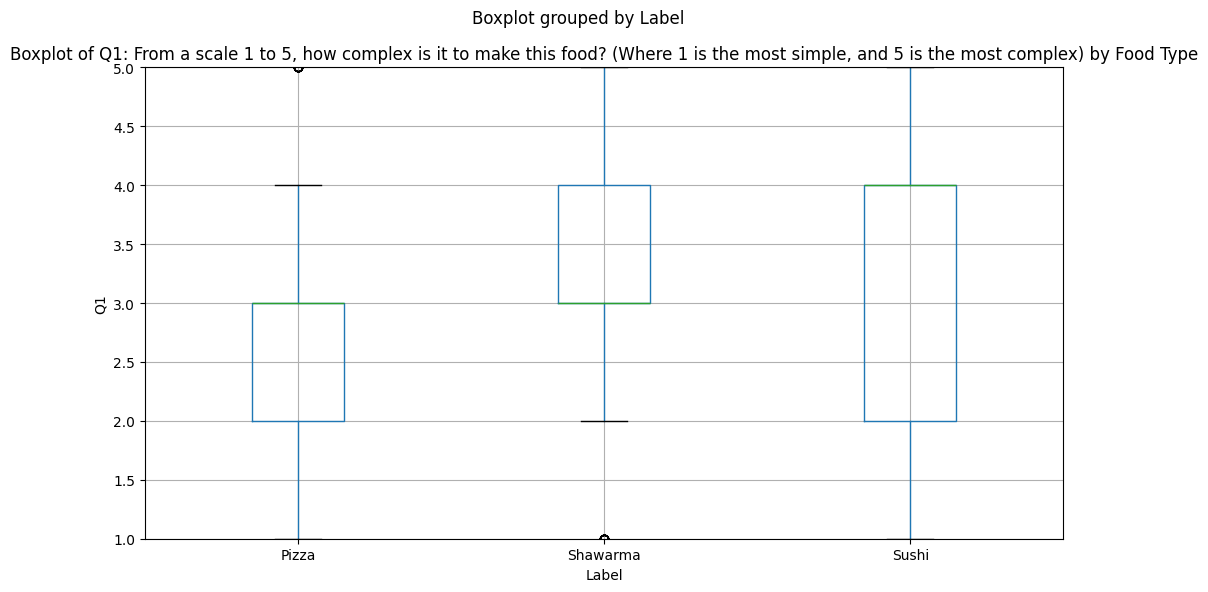

<Figure size 1000x600 with 0 Axes>

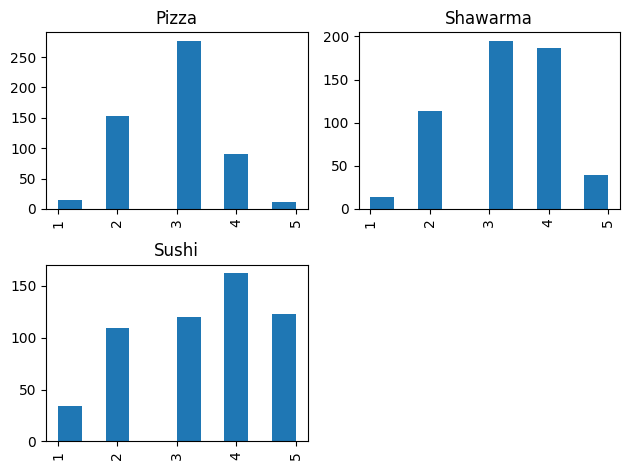

<Figure size 800x600 with 0 Axes>

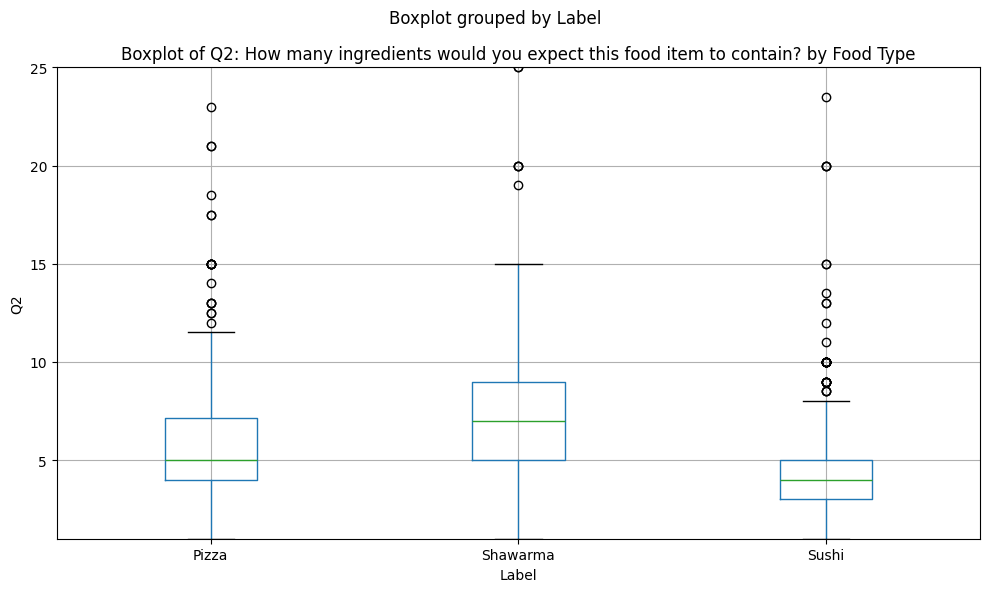

<Figure size 1000x600 with 0 Axes>

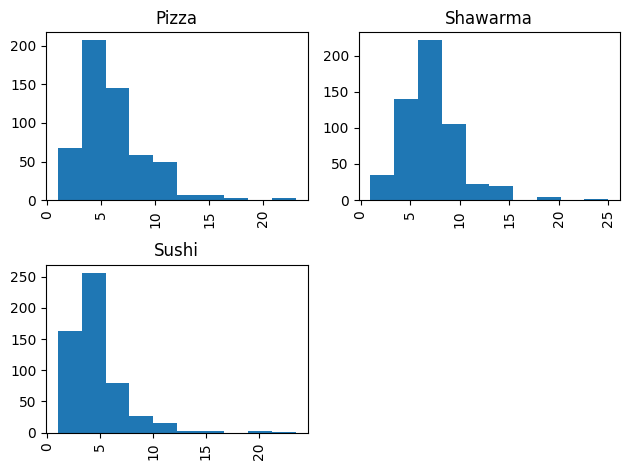

<Figure size 800x600 with 0 Axes>

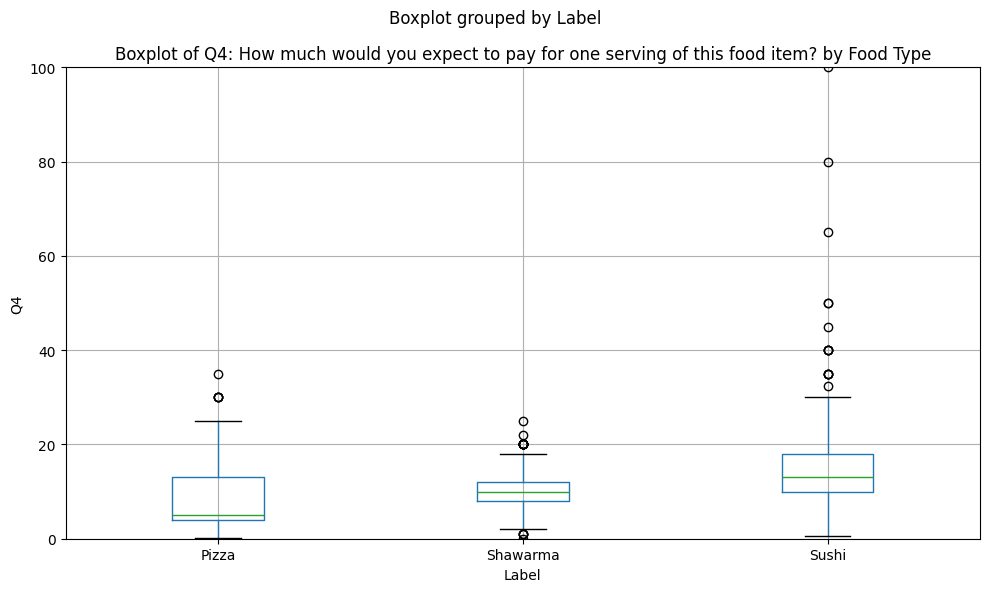

<Figure size 1000x600 with 0 Axes>

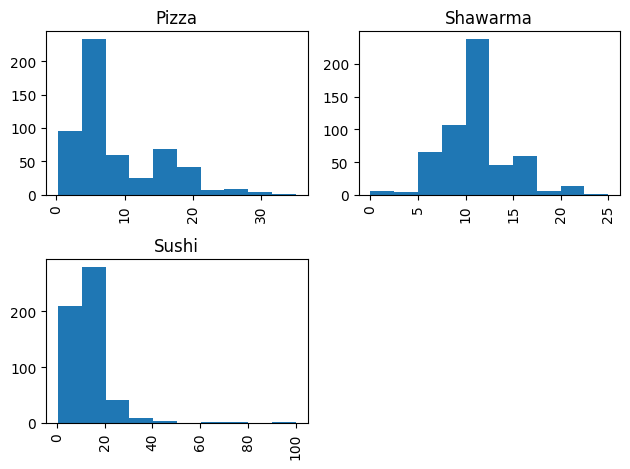

In [6]:

# Do a box plot for each numerical column
numerical_columns = [1, 2, 4]

for i in numerical_columns:
    plt.figure(figsize=(8, 6))
    column_name = data.columns[i]
    
    # Get all values for this numerical column across all labels
    all_values = data[data["Label"].isin(data["Label"].unique())][column_name]
    min_val = all_values.min()
    max_val = all_values.max()
    
    # Create a box plot with consistent y-axis limits
    # data.boxplot(column=column_name, by='Label', figsize=(10, 6))
    # plt.title(f"Boxplot of {column_name} by Food Type")
    # plt.ylabel(column_name.split(':')[0])
    # plt.ylim(min_val, max_val)  # Set consistent y-axis limits
    # plt.tight_layout()
    # plt.savefig(f"boxplot_{column_name}.png")
    # plt.show()

    # Create a histogram with consistent y-axis limits
    plt.figure(figsize=(10, 6))
    data.hist(column=column_name, by='Label', bins=10)
    plt.title(f"Histogram of {column_name} by Food Type")
    plt.ylabel(column_name.split(':')[0])
    
    # Determine the maximum frequency for consistent y-axis
    max_freq = data[column_name].value_counts().max() if not data[column_name].empty else 1
    plt.ylim(0, max_freq)  # Set consistent y-axis limits
    
    plt.tight_layout()
    plt.savefig(f"histogram_{column_name}.png")
    plt.show()